<a href="https://colab.research.google.com/github/fantajeon/DLPytorch1.2/blob/master/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch 1.2 버전 설치

Author: Hyeokjune Jeon(fantajeon@gmail.com)

Colab을 통하여 작성했으며, 기본적인 패키지들은 설치가 되어있습니다. 예를들면, matplotlib같은 것입니다.

In [195]:
!pip install --upgrade torch==1.2 torchvision==0.4

Requirement already up-to-date: torch==1.2 in /usr/local/lib/python3.6/dist-packages (1.2.0)
Requirement already up-to-date: torchvision==0.4 in /usr/local/lib/python3.6/dist-packages (0.4.0)


PyTorch 버전은 1.2.0 기준입니다.

In [0]:
from __future__ import print_function

import torch
torch.__version__

'1.2.0'

차후에 화면에 그래프를 그릴 것이기 때문에 미리 import 해 놓습니다.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# 이제 시작해 보겠습니다.
이 번은 맛보기입니다. 한번 경험을 통해서 계속해서 개념들을 더해가면서, 딥러닝에 익숙해지도록 해보겠습니다. 많은 부분을 지금 당장 이해하지 않으셔도 됩니다. 바로 보고 이해하신다고 하면, 이미 기존에 기초가 탄탄하셨던 분일 것입니다. 너무 좌절하지 하지 마시고, 천천히 진행해 보겠습니다.

## 꼭 알아야할 내용
1. $x$,$y$로부터 $w$,$b$를 찾는다.
2. 모델은 $y=wx + b$  이다.
3. Loss 함수와 연관하여 $w$,$b$를 찾는 과정: gradient descent, learning rate.

나열한 단어들간에 개념 연결입니다.

다음 주어진 x, y 데이터를 근거로 w, b를 찾아라



$$y = wx + b$$

일반적으로 w, b의 값을 선언할때 값을 지정을 해줘야 합니다. 보통은 random하게 값을 지정해 줍니다. 

계속 진행하면서 전역변수 x, y, w, b임을 기억해주세요.


In [203]:
# dataset
x = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], dtype=torch.float32)
y = torch.tensor([15, 25, 40, 55, 65, 66], dtype=torch.float32)
# requires_grad=True는 미분 값을 가진다는 것임.
w = torch.rand(1, dtype=torch.float32, requires_grad=True)
b = torch.rand(1, dtype=torch.float32, requires_grad=True)

# model parameter, w and b
def model(x):
  return w*x + b

pred_y = model(x)
print(pred_y)

tensor([0.0548, 0.1048, 0.1547, 0.2047, 0.2546, 0.3046],
       grad_fn=<AddBackward0>)


이제 학습할 목표를 설계해야 합니다. x로부터 예측한 pred_y와 관촬된 y의 관계를 정의해야 합니다.
여러가지 있지만 지금은 가장 단순한 방법인 두 변수의 오차의 제곱으로 해봅니다. 
$$L = \frac{1}{2} \sum { (\text{pred_y} - y)^2 } $$를 합니다.
보통 여기서 L을 loss 함수라고 합니다. 이 값을 줄이면, 우리가 원하는 w, b값을 정확히 찾을 수 있을 거라고 희망하면서 진행합니다.

In [0]:
def loss(pred_y, y):
  return 0.5*(pred_y - y).pow(2.0).sum()

이제 이 것을 미분해서 기울기가 작은쪽으로 가도록 w, b를 천천히 움직여 봅시다. PyTorch에서는 backward() 함수를 호출하여, 이 두 변수의 미분값을 계산합니다. 신기합니다!! 자동으로 미분을 해줍니다. 이건 PyTorch가 연산 과정을 내부적으로 다 기록을 해놓고(computation graph칭함), 이 기록의 근거하여 자동으로 미분값을 계산할 수 있습니다. 이 방법을 gradient descent 방법이라 합니다. 가장 단순하면서 여기서부터 학습이 시작됩니다. 너무 많은 정보는 지금 어려울 수 있으니, 그렇다 치고 넘어갑시다.

### Computation Graph
그래프에 노드에 변수와 에지에 연산의 개념을 연결시켜서, 입력 변수들이 어떠한 복잡한 계산 과정거치면서 출력 변수까지 연결되어 있는지 기록되어 있는 자료구조입니다. 특히 이러한 과정을 입력에서 출력까지 그래프 계산하는 과정을 forward라고 하고, forward의 역순서로 오차와 미분값을가지고 그래프 연산을 전파하는 과정을 backward라고 합니다(backpropagation algorithm). 이러한 그래프 구조는 모든 정보를 포함하고 있어서 자동 미분이 가능해집니다.


In [205]:
pred_y = model(x)
L = loss(pred_y, y)
L.backward()
print("gradient of w", w.grad)
print("gradient of b", b.grad)

gradient of w tensor([-112.1352])
gradient of b tensor([-264.9218])


**Gradient Decendent 방법으로 최적화를 해보자!**
$$\begin{equation} 
w_{t+1} = w_{t} - \eta \frac{\partial L}{\partial w} \\
b_{t+1} = b_{t} - \eta \frac{\partial L}{\partial b}
\end{equation}$$
여기서 t와 t+1은 업데이트 순서입니다. 이것의 의미는 현재 값을 기준으로 미분한 방향에서 L값이 작은 쪽으로 값을 이동합니다. 그리고 $\eta$는 learning rate라고 합니다. 이번 순서($t$)에서 $w$와  $b$를 얼마만큼 움직여서 오차($L$)를 줄여나갈지 결정해 줍니다. 주의할 점은 너무 크게 또는 작게 w와 b를 움직이면 학습에 실패할 수 있다.

<img width='320px' src='https://fantajeon.github.io/DLPytorch1.2_Materials/images/gradient_descent.svg' />

이 learning rate로 한번에 학습을 하지 않는다는 이야기는 반복적으로 적당하게 w,b를 움직이면서 L값을 관촬해야 한다는 것입니다.

휴~ 많이 따라 오셨습니다. 이제 하나로 묶어서 L값을 관찰해보겠습니다.

In [206]:
learning_rate = 0.0001

for step in range(300000):
  # PyTorch는 Dynamic하게 연산을 기록하는 기능 때문에, 
  # 매번 loop에서 x-->loss-->backward()-->gradient descent를 해줘야 함.
  pred_y = model(x)
  L = loss(pred_y, y)
  L.backward()

  # torch.no_grad()는 computation graph에 기록하지 않는다.
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

  if step % 10000 == 0:
    print("Step:{}, L:{:.5}, w={:.3}, b={:.3}, grad(w)={:.3}, grad(b)={:.3}".format(step, L.item(), w.item(), b.item(), w.grad.item(), b.grad.item()))

  w.grad.zero_()
  b.grad.zero_()

Step:0, L:6970.6, w=0.522, b=0.0579, grad(w)=-2.24e+02, grad(b)=-5.3e+02
Step:10000, L:644.71, w=28.8, b=35.0, grad(w)=-13.0, grad(b)=4.3
Step:20000, L:484.52, w=40.7, b=30.8, grad(w)=-11.0, grad(b)=3.95
Step:30000, L:367.14, w=50.9, b=27.1, grad(w)=-9.41, grad(b)=3.38
Step:40000, L:281.12, w=59.6, b=24.0, grad(w)=-8.06, grad(b)=2.9
Step:50000, L:218.09, w=67.0, b=21.3, grad(w)=-6.9, grad(b)=2.48
Step:60000, L:171.91, w=73.4, b=19.0, grad(w)=-5.91, grad(b)=2.12
Step:70000, L:138.06, w=78.9, b=17.0, grad(w)=-5.06, grad(b)=1.82
Step:80000, L:113.26, w=83.6, b=15.3, grad(w)=-4.33, grad(b)=1.56
Step:90000, L:95.085, w=87.6, b=13.9, grad(w)=-3.7, grad(b)=1.33
Step:100000, L:81.768, w=91.0, b=12.7, grad(w)=-3.17, grad(b)=1.14
Step:110000, L:72.009, w=94.0, b=11.6, grad(w)=-2.71, grad(b)=0.977
Step:120000, L:64.857, w=96.5, b=10.7, grad(w)=-2.32, grad(b)=0.837
Step:130000, L:59.62, w=98.6, b=9.93, grad(w)=-1.99, grad(b)=0.713
Step:140000, L:55.779, w=1e+02, b=9.27, grad(w)=-1.7, grad(b)=0.612

w는 110근처, b는 5.7 근처에서 찾았습니다. 이제 화면에 그려보도록 하겠습니다.

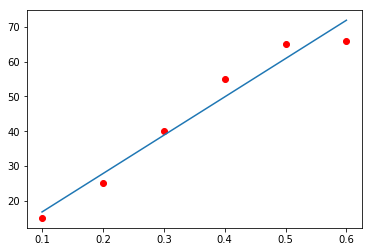

In [0]:
# numpy는 공학자들이 많이 쓰는 공학용 계산 framework입니다. PyTorch는 Numpy와 호환이 잘 되도록 설계되었습니다.
x_numpy = x.numpy()
y_numpy = y.numpy()
# 아래에 detach는 연산을 기록하는 graph에서 때낸다. 향후 어떠한 연산을 해도 그래프에 기록되지 않을 것입니다.
pred_y = model(x).detach().numpy()  
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,pred_y,label='Fitted line')

다음에 더 자세한 이야기(Tensor, Numpy, Computation Graph, Backpropgation, Deep learning 등)를 진행해 보겠습니다. 오늘은 이만 이 정도까지 정리해보겠습니다.

**감사합니다.**

#전체 코드입니다.

In [0]:
# dataset
x = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], dtype=torch.float32)
y = torch.tensor([15, 25, 40, 55, 65, 66], dtype=torch.float32)
w = torch.rand(1, dtype=torch.float32, requires_grad=True) 
b = torch.rand(1, dtype=torch.float32, requires_grad=True)  

# model parameter, w and b
def model(x):
  return w*x + b

def loss(pred_y, y):
  return 0.5*(pred_y - y).pow(2.0).sum()

learning_rate = 0.0001

for step in range(300000):
  pred_y = model(x)
  L = loss(pred_y, y)
  L.backward()

  # torch.no_grad()는 computation graph에 기록하지 않는다.
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
  if step % 10000 == 0:
    print("Step:{}, L:{:.5}, w={}, b={}".format(step, L.item(), w.item(), b.item()))